In [1]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
import re
from konlpy.tag import Okt
from tensorflow.keras.preprocessing.text import Tokenizer
import numpy as np
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.datasets import reuters
from tensorflow.keras.utils import to_categorical

tokenized_contents = './resource/1_tokenized/news_tokenized.csv'

In [2]:
# 데이터 불러오기, train, test 데이터 분할

input_data = pd.read_table(tokenized_contents, ',')

del input_data["title"], input_data["tokenized_morphs"], input_data["tokenized_nouns"]

test_data = pd.DataFrame()
test_data = test_data.append(input_data[:1000])
test_data = test_data.append(input_data[3000:4000])
test_data = test_data.append(input_data[6000:7000])
test_data = test_data.append(input_data[9000:10000])
test_data = test_data.append(input_data[12000:13000])
test_data = test_data.append(input_data[15000:16000])
test_data = test_data.reset_index(drop=True)

train_data = pd.DataFrame()
train_data = train_data.append(input_data[1000:3000])
train_data = train_data.append(input_data[4000:6000])
train_data = train_data.append(input_data[7000:9000])
train_data = train_data.append(input_data[10000:12000])
train_data = train_data.append(input_data[13000:15000])
train_data = train_data.append(input_data[16000:18000])
train_data = train_data.reset_index(drop=True)

In [3]:
train_data[:5]

,category,title_cleaned
0,0,민주당 평가 하위 의원에 사전통보
1,0,자유한국당이 한다는 필리버스터 뜻이 뭐길래
2,0,신보라 정미경 황교안 만류에도 단식 계속
3,0,김의겸 흑석동 집 팔겠다 매각 차액은 전액기부
4,0,군산 출마설 김의겸 흑석동 집 팔고 차액은 기부


In [4]:
test_data[:5]

,category,title_cleaned
0,0,바른미래 유승민 오신환 권은희 유의동 중징계에 효력없어반론도
1,0,주말동안 책읽은 대통령 SNS서 도올 김용옥 책 추천
2,0,백원우 휘하 하명수사 의혹 특감반원 사망에 입장 낼 사안 아냐
3,0,오신환 손학규 막장정치에 환멸 원내대표직 계속 수행
4,0,저널리즘 토크쇼 J 언론의 지소미아 보도 누구의 시각인가


In [5]:
print(len(train_data))
print(len(test_data))

12000
6000


In [6]:
# 토큰화 과정
okt = Okt()
stopwords = ['오','신','환','의','가','이','은','들','는','좀','잘','걍','과','도','를','으로','자','에','와','한','하다']

X_train = []
X_test = []

In [7]:
for sentence in train_data['title_cleaned']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    # temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_train.append(temp_X)

In [8]:
for sentence in test_data['title_cleaned']:
    temp_X = []
    temp_X = okt.morphs(sentence, stem=True) # 토큰화
    # temp_X = [word for word in temp_X if not word in stopwords] # 불용어 제거
    X_test.append(temp_X)

In [9]:
print(X_train[:3])
print(X_test[:3])

[['민주당', '평가', '하위', '의원', '에', '사전', '통보'], ['자유', '한국', '당', '이', '한다는', '필리버스터', '뜻', '이', '뭐길', '래'], ['신보라', '정미경', '황교안', '만류', '에도', '단식', '계속']]
[['바른', '미래', '유승민', '오', '신', '환', '권은희', '유의', '동', '중', '징계', '에', '효력', '없다', '반론', '도'], ['주말', '동안', '책', '읽다', '대통령', 'SNS', '서다', '도올', '김용옥', '책', '추천'], ['백원우', '휘하', '하명', '수사', '의혹', '특감', '반원', '사망', '에', '입장', '낼', '사안', '알다']]


In [10]:
# 정수 인덱싱
max_word = 1000
tokenizer = Tokenizer(num_words=max_word)
tokenizer.fit_on_texts(X_train)
X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

In [11]:
X_train

[[82, 825, 77, 1, 856],
 [199, 4, 10, 11, 124, 11],
 [420, 363, 59, 179, 150],
 [513, 857, 326, 465, 16, 364],
 [781, 929, 513, 857, 326, 16, 364],
 [513, 857, 498, 72, 326, 465, 364],
 [13, 560, 7, 170, 406],
 [442, 407, 171, 14, 124, 5, 11],
 [639, 443, 18],
 [513, 857, 25, 326, 465, 16, 364],
 [513, 857, 25, 326, 2, 55, 364],
 [513, 857, 25, 261, 326, 465, 16, 364],
 [524, 131, 88, 6, 498, 781, 11, 55, 16],
 [513, 857, 930, 326, 364],
 [524, 326, 68, 256, 16, 984, 886, 131],
 [365, 116, 168, 640, 341, 3, 2, 222, 543],
 [513, 857, 326, 465, 71, 364],
 [615, 641, 16, 3, 22],
 [466, 88, 261, 17, 88],
 [119, 782, 3, 16, 206, 83, 3],
 [4, 10, 215, 407, 84, 5, 327],
 [513, 857, 25, 326, 16, 364],
 [150, 59, 397, 336],
 [513, 857, 25, 326, 465, 71, 364],
 [593, 887, 135, 1, 826, 616, 281, 55],
 [161, 131, 888, 84, 124, 889, 525, 514],
 [513, 857, 261, 326, 48, 465],
 [112, 13, 287, 783, 576, 985, 141],
 [77, 196, 13, 77, 27, 594, 20, 17],
 [30, 498, 45, 350, 2],
 [161, 525, 25],
 [513, 857

뉴스 기사의 최대 길이 :20
뉴스 기사의 평균 길이 :5.514583333333333


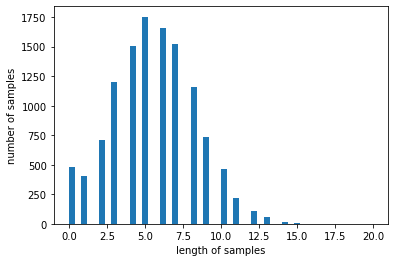

In [12]:
print('뉴스 기사의 최대 길이 :{}'.format(max(len(l) for l in X_train)))
print('뉴스 기사의 평균 길이 :{}'.format(sum(map(len, X_train))/len(X_train)))

plt.hist([len(s) for s in X_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

In [13]:
# padding

max_len = 8
X_train = pad_sequences(X_train, maxlen=max_len)
X_test = pad_sequences(X_test, maxlen=max_len)
print(X_train[:3])
print(X_test[:3])

[[  0   0   0  82 825  77   1 856]
 [  0   0 199   4  10  11 124  11]
 [  0   0   0 420 363  59 179 150]]
[[ 62 202 256  27 907   1  38  14]
 [  0   0 868 913  64 409 868 869]
 [ 88 115 203 192  80   1 936 422]]


In [14]:
# category one-hot encoding
y_train = np.array(train_data['category'])
y_test = np.array(test_data['category'])

y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [15]:
print(y_train[:3])
print(y_test[:3])

[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]
[[1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0.]]


In [16]:
# 사전 정의된 w2v model 불러오기
import gensim

model_file_name = './resource/3_w2v/w2v_content'

vocab_size = 14794

word2vec_model = gensim.models.KeyedVectors.load_word2vec_format(model_file_name)
print(word2vec_model)
print(len(tokenizer.word_index.items()))

14794


In [20]:
emDim = 100
embedding_matrix = np.zeros((vocab_size, emDim))
np.shape(embedding_matrix)

(14794, 100)

In [21]:
def get_vector(word):
    if word in word2vec_model:
        return word2vec_model[word]
    else:
        return None

In [22]:
# 벡터화
for word, i in tokenizer.word_index.items():
    temp = get_vector(word)
    if temp is not None: 
        embedding_matrix[i] = temp

In [58]:
# 학습
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Embedding

model = Sequential()
e = Embedding(vocab_size, emDim, weights=[embedding_matrix], input_length=max_len, trainable=False)
model.add(e)
model.add(LSTM(100))
model.add(Dense(6, activation='softmax'))

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

history = model.fit(X_train, y_train, batch_size=1000, epochs=40, validation_data=(X_test, y_test))

Train on 12000 samples, validate on 6000 samples
Epoch 1/40
12000/12000 [==============================] - 2s 135us/sample - loss: 1.7510 - accuracy: 0.2758 - val_loss: 1.6875 - val_accuracy: 0.3437
Epoch 2/40
12000/12000 [==============================] - 1s 45us/sample - loss: 1.6453 - accuracy: 0.3400 - val_loss: 1.6043 - val_accuracy: 0.3760
Epoch 3/40
12000/12000 [==============================] - 1s 45us/sample - loss: 1.5900 - accuracy: 0.3658 - val_loss: 1.5495 - val_accuracy: 0.3840
Epoch 4/40
12000/12000 [==============================] - 1s 45us/sample - loss: 1.5563 - accuracy: 0.3662 - val_loss: 1.5253 - val_accuracy: 0.4013
Epoch 5/40
12000/12000 [==============================] - 1s 45us/sample - loss: 1.5329 - accuracy: 0.3795 - val_loss: 1.5146 - val_accuracy: 0.3903
Epoch 6/40
12000/12000 [==============================] - 1s 45us/sample - loss: 1.5137 - accuracy: 0.3823 - val_loss: 1.4952 - val_accuracy: 0.4097
Epoch 7/40
12000/12000 [==============================] 

In [59]:
print("\n 테스트 정확도: %.4f" % (model.evaluate(X_test, y_test)[1]))

6000/6000 [==============================] - 1s 89us/sample - loss: 1.3515 - accuracy: 0.4702

 테스트 정확도: 0.4702


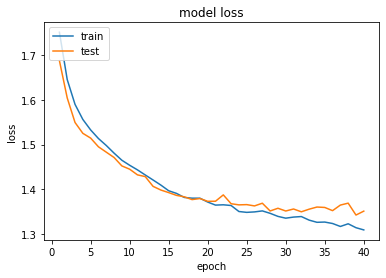

In [60]:
epochs = range(1, len(history.history['accuracy']) + 1)
plt.plot(epochs, history.history['loss'])
plt.plot(epochs, history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()